## 텐서플로 2.x 를 이용한  CNN MNIST

- 538 ~ 557

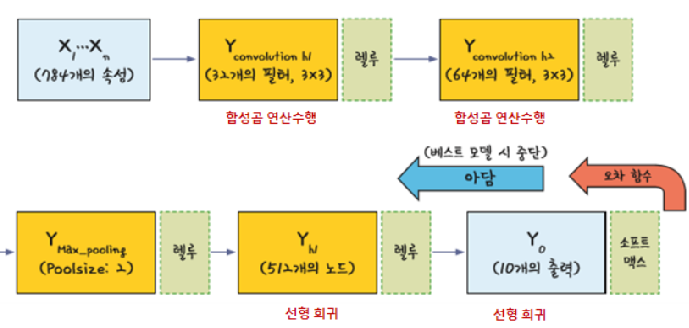

In [ ]:
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# 1. shape 확인
# X_train, X_test
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)

# 4차원 아님 -> 따라서 reshape
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

# reshape 확인
print("X_train.reshape : ", X_train.shape)
print("X_train.reshape : ", X_test.shape)


# y 동일
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

# 2차원 아님 -> 따라서 reshape
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# reshape 확인
print("y_train.reshape:", y_train.shape)
print("y_test.reshape:", y_test.shape)

X_train.shape :  (60000, 28, 28)
X_test.shape :  (10000, 28, 28)
X_train.reshape :  (60000, 28, 28, 1)
X_train.reshape :  (10000, 28, 28, 1)
y_train.shape: (60000,)
y_test.shape: (10000,)
y_train.reshape: (60000, 1)
y_test.reshape: (10000, 1)


In [ ]:
# 객체 생성
enc = OneHotEncoder()

# y_train 종류 파악
enc.fit(y_train)

# y_train 인코딩
y_train_onehot = enc.transform(y_train).toarray()

# 타입 변경
y_train_onehot = np.array(y_train_onehot, dtype="float32")

# y_test 인코딩
y_test_onehot = enc.transform(y_test).toarray()

# 타입 변경
y_test_onehot = np.array(y_test_onehot, dtype="float32")

In [ ]:
# 순차차모델 생성
model = Sequential()

# 합성곱 연산
model.add(Conv2D(
                 32, 
                 kernel_size=(3,3), 
                 strides=1,
                 input_shape=(28, 28, 1),
                 padding="SAME",
                 activation="relu"
                 )
)

# 합성곱 연산
model.add(Conv2D(
                 64, 
                 kernel_size=(3,3), 
                 strides=1,
                 padding="SAME",
                 activation="relu"
                 )
)
# 맥스 풀링
model.add(MaxPooling2D(pool_size=2, strides=1, padding="SAME"))

# fully_connected layer
model.add(Flatten())

# 선형회귀
model.add(Dense(512, activation = 'relu'))

# 분류
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate = 0.001),
    metrics = ['acc']
)
model.fit(X_train, y_train_onehot, epochs = 5, batch_size = 100)

Epoch 1/5
600/600 [==============================] - 51s 35ms/step - loss: 4.7934 - acc: 0.9280
Epoch 2/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0579 - acc: 0.9815
Epoch 3/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0323 - acc: 0.9901
Epoch 4/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0274 - acc: 0.9912
Epoch 5/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0253 - acc: 0.9920


In [ ]:
# 예측
predict = model.predict(X_test)

predict01 = np.argmax(predict, 1)

target = np.argmax(y_test_onehot, 1)

predict02 = (predict01 ==target)

predict03 = tf.cast(predict02, dtype = tf.float32)

acc = tf.reduce_mean(predict03)

print("정확도", acc.numpy())

정확도 0.9757


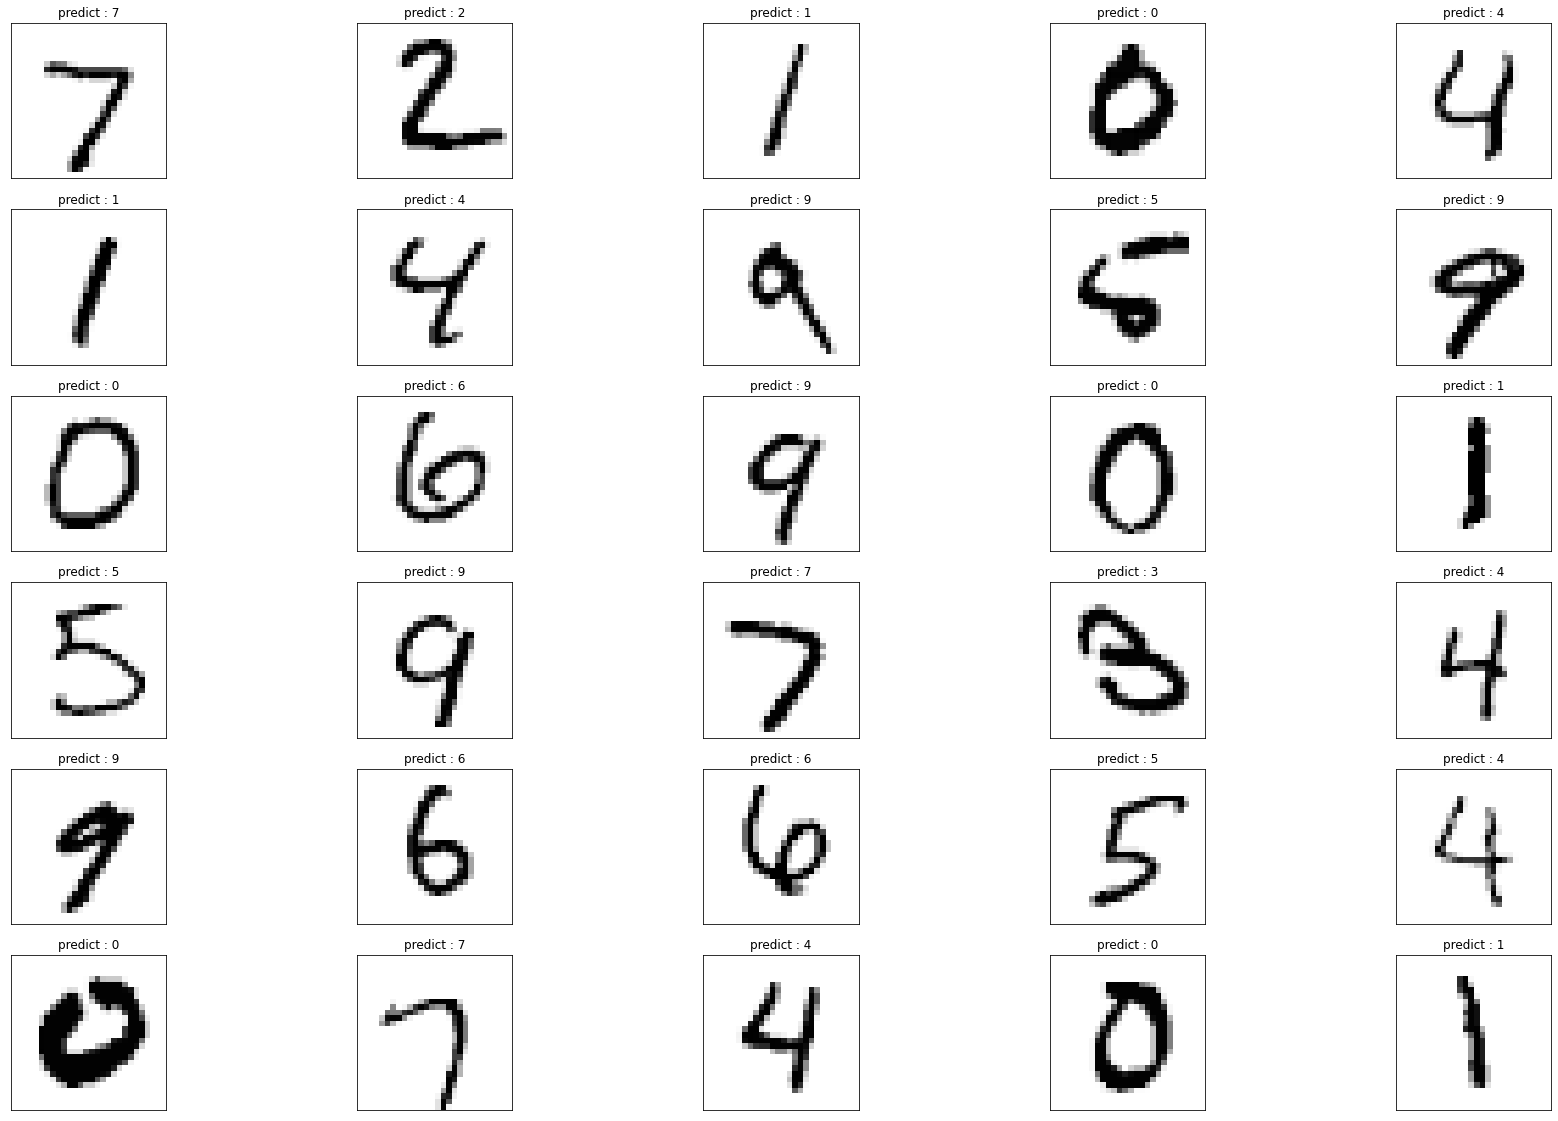

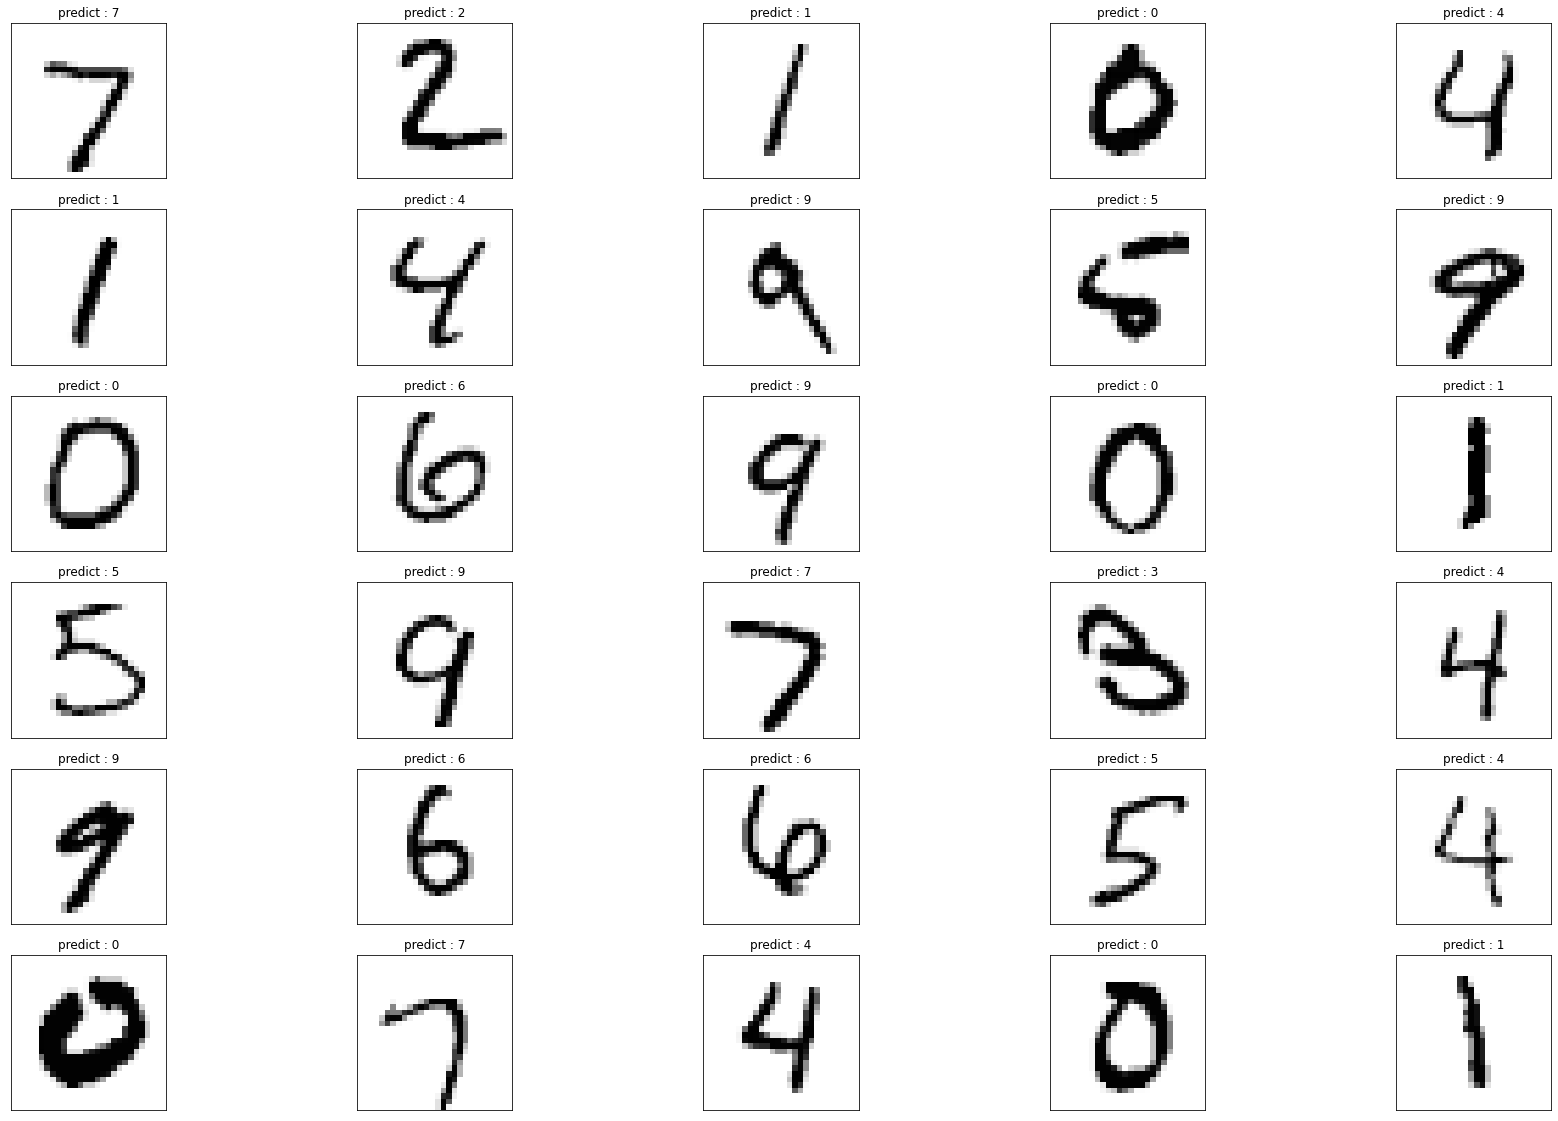

In [ ]:
fig = plt.figure(figsize = (30, 20))
for i in range(30):
  subplot = fig.add_subplot(6, 5, i+1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  subplot.set_title('predict : %d' % predict01[i])
  subplot.imshow(X_test[i].reshape((28 ,28)), cmap = 'Greys')

plt.show()